<a href="https://colab.research.google.com/github/CarlosRivera1212/clase_CE/blob/main/Final_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (File -> Download as -> PDF via LaTeX). You should then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [180]:
import tensorflow as tf
from scipy.io import loadmat
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback

import matplotlib.pyplot as plt
import numpy as np

In [181]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


![SVHN overview image](content/svhn_examples.jpg)

For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an  image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images. 

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [182]:
# Run this cell to load the dataset

# train = loadmat('data/train_32x32.mat')
# test = loadmat('data/test_32x32.mat')

file_path = '/content/drive/MyDrive/R y Python/My_Python/coursera_tf/Data/'
train = loadmat(file_path + 'train_32x32.mat')
test = loadmat(file_path + 'test_32x32.mat')

In [183]:
checkpoint_path_MLP = file_path+'model_checkpoints/checkpoints/model_MLP.h5'
checkpoint_path_CNN = file_path+'model_checkpoints/checkpoints/model_CNN.h5'

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [184]:
X_train = train['X']
y_train = train['y']-1
X_test = test['X']
y_test = test['y']-1
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32, 32, 3, 73257)
(73257, 1)
(32, 32, 3, 26032)
(26032, 1)


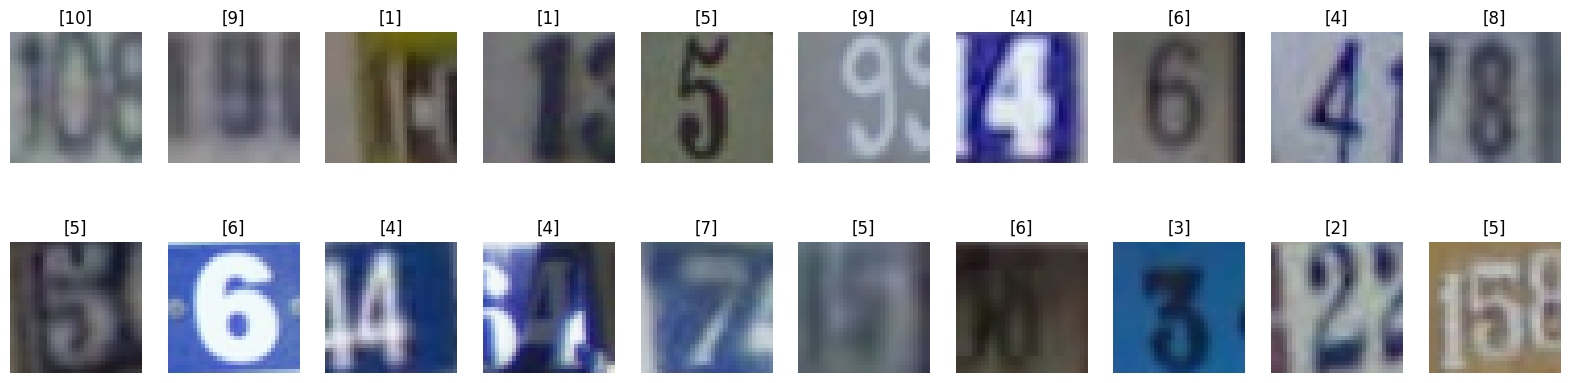

In [185]:
np.random.seed(123)
rand_pos = np.random.randint(0, y_train.shape[0], 20)

plt.figure(figsize=(20,5))
for i in range(20):
    img_i = rand_pos[i]
    plt.subplot(2,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[..., img_i])
    plt.title(y_train[img_i]+1)

plt.show()

In [186]:
# X_train_mean = X_train.mean(axis=2, keepdims=True)
# X_test_mean = X_test.mean(axis=2, keepdims=True)

X_train_mean = [X_train[...,i].mean(axis=2) for i in range(X_train.shape[3])]
X_train_mean = np.array(X_train_mean)
print(X_train_mean.shape)

X_test_mean = [X_test[...,i].mean(axis=2) for i in range(X_test.shape[3])]
X_test_mean = np.array(X_test_mean)
print(X_train_mean.shape)

(73257, 32, 32)
(73257, 32, 32)


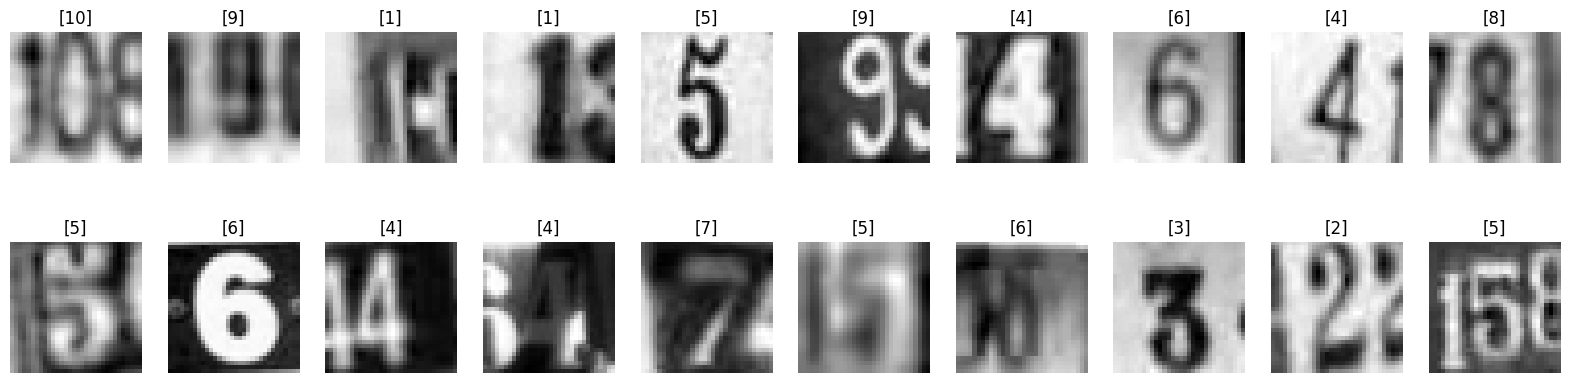

In [187]:
plt.figure(figsize=(20,5))
for i in range(20):
    img_i = rand_pos[i]
    plt.subplot(2,10,i+1)
    plt.axis('off')
    plt.imshow(X_train_mean[img_i], cmap='gray')
    plt.title(y_train[img_i]+1)

plt.show()

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [188]:
# tf.keras.backend.clear_session()

In [189]:
def get_model_MLP():
  n = 1024
  mod = Sequential([
      Flatten(input_shape=(32,32)),
      Dense(n, activation='relu'),
      Dense(n, activation='relu'),
      Dense(n, activation='relu'),
      Dense(10, activation='softmax')
  ])
  return mod

model_MLP = get_model_MLP()
model_MLP.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 1024)              0         
                                                                 
 dense_26 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_27 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_28 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_29 (Dense)            (None, 10)                10250     
                                                                 
Total params: 3,159,050
Trainable params: 3,159,050
Non-trainable params: 0
_________________________________________________________________


In [190]:
checkpoint_MLP = ModelCheckpoint(checkpoint_path_MLP, save_weights_only=True, save_best_only=True)

early_stopping = EarlyStopping(monitor='val_sparse_categorical_accuracy',
                               patience=5, min_delta=0.01, mode='max')
# early_stopping = EarlyStopping(monitor='val_mean_absolute_error',
#                                patience=5, min_delta=0.01, mode='max')
# early_stopping = EarlyStopping(monitor='val_loss',
#                                patience=5, min_delta=0.01, mode='min')

class TrainingCallback(Callback):
  def on_epoch_end(self, epoch, logs=None):
    print('Finished epoch {} - loss: {:7.2f} - val_loss: {:7.2f}'.format(epoch, logs['loss'], logs['val_loss']))

In [191]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model_MLP.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=[acc, mae])

In [192]:
history_MLP = model_MLP.fit(
    X_train_mean, y_train, epochs=30, batch_size=500, verbose=0,
    validation_data=(X_test_mean, y_test),
    callbacks=[checkpoint_MLP, early_stopping, TrainingCallback()]
)

Finished epoch 0 - loss:   25.06 - val_loss:    1.93
Finished epoch 1 - loss:    1.58 - val_loss:    1.43
Finished epoch 2 - loss:    1.26 - val_loss:    1.28
Finished epoch 3 - loss:    1.10 - val_loss:    1.17
Finished epoch 4 - loss:    0.97 - val_loss:    1.12
Finished epoch 5 - loss:    0.89 - val_loss:    1.10
Finished epoch 6 - loss:    0.82 - val_loss:    1.00
Finished epoch 7 - loss:    0.78 - val_loss:    0.96
Finished epoch 8 - loss:    0.72 - val_loss:    0.93
Finished epoch 9 - loss:    0.69 - val_loss:    0.91
Finished epoch 10 - loss:    0.67 - val_loss:    0.91
Finished epoch 11 - loss:    0.64 - val_loss:    0.96
Finished epoch 12 - loss:    0.61 - val_loss:    0.87
Finished epoch 13 - loss:    0.61 - val_loss:    0.88
Finished epoch 14 - loss:    0.58 - val_loss:    0.85
Finished epoch 15 - loss:    0.55 - val_loss:    0.90
Finished epoch 16 - loss:    0.54 - val_loss:    0.87
Finished epoch 17 - loss:    0.52 - val_loss:    0.90
Finished epoch 18 - loss:    0.50 - va

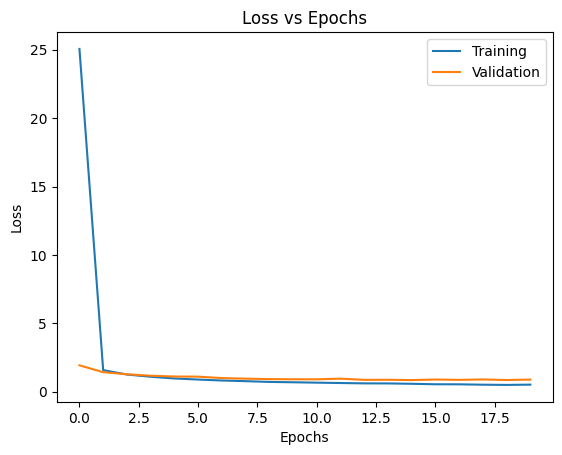

In [193]:
plt.plot(history_MLP.history['loss'])
plt.plot(history_MLP.history['val_loss'])
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

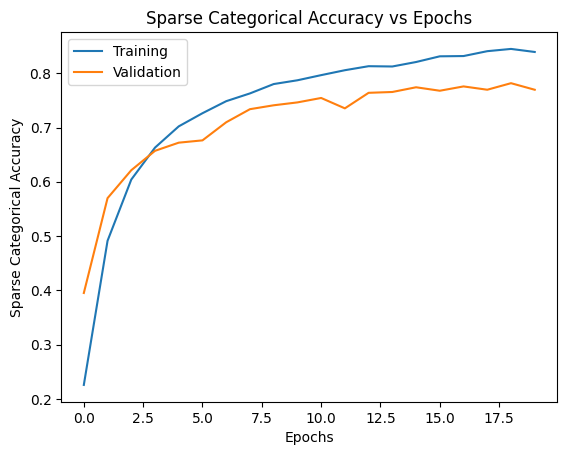

In [194]:
plt.plot(history_MLP.history['sparse_categorical_accuracy'])
plt.plot(history_MLP.history['val_sparse_categorical_accuracy'])
plt.title('Sparse Categorical Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Sparse Categorical Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [195]:
model_MLP.evaluate(X_test_mean, y_test, verbose=0)

[0.8908458352088928, 0.7695912718772888, 3.3616154193878174]

## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [196]:
# tf.keras.backend.clear_session()

def get_model_CNN():
  wd = 3e-5
  rate = 0.03

  mod = Sequential([
      Conv2D(32, (3,3), activation='relu', input_shape=(32,32,1)),
      BatchNormalization(name='BN_1'),
      Conv2D(32, (3,3), activation='relu'),
      BatchNormalization(name='BN_2'),
      Conv2D(32, (3,3), activation='relu'),
      MaxPooling2D((3,3), name='MP_1'),

      Flatten(),
      Dense(32, activation='relu', kernel_regularizer=regularizers.l1(wd)),
      Dropout(rate),
      Dense(10, activation='softmax')
  ])

  return mod

model_CNN = get_model_CNN()
model_CNN.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 BN_1 (BatchNormalization)   (None, 30, 30, 32)        128       
                                                                 
 conv2d_23 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 BN_2 (BatchNormalization)   (None, 28, 28, 32)        128       
                                                                 
 conv2d_24 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 MP_1 (MaxPooling2D)         (None, 8, 8, 32)          0         
                                                                 
 flatten_11 (Flatten)        (None, 2048)            

In [197]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model_CNN.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=[acc, mae])

In [198]:
checkpoint_CNN = ModelCheckpoint(checkpoint_path_CNN, save_weights_only=True, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=5, min_delta=0.01, mode='max')
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.01, mode='min')

history_CNN = model_CNN.fit(
    X_train_mean, y_train, epochs=30, batch_size=10, verbose=0,
    validation_data=(X_test_mean, y_test),
    callbacks=[checkpoint_CNN, early_stopping, TrainingCallback()]
)

Finished epoch 0 - loss:    0.94 - val_loss:    0.67
Finished epoch 1 - loss:    0.54 - val_loss:    0.59
Finished epoch 2 - loss:    0.47 - val_loss:    0.50
Finished epoch 3 - loss:    0.43 - val_loss:    0.48
Finished epoch 4 - loss:    0.40 - val_loss:    0.47
Finished epoch 5 - loss:    0.37 - val_loss:    0.45
Finished epoch 6 - loss:    0.35 - val_loss:    0.45
Finished epoch 7 - loss:    0.34 - val_loss:    0.43
Finished epoch 8 - loss:    0.32 - val_loss:    0.44
Finished epoch 9 - loss:    0.31 - val_loss:    0.43
Finished epoch 10 - loss:    0.30 - val_loss:    0.44
Finished epoch 11 - loss:    0.29 - val_loss:    0.45
Finished epoch 12 - loss:    0.28 - val_loss:    0.42
Finished epoch 13 - loss:    0.27 - val_loss:    0.41
Finished epoch 14 - loss:    0.26 - val_loss:    0.41
Finished epoch 15 - loss:    0.26 - val_loss:    0.42
Finished epoch 16 - loss:    0.25 - val_loss:    0.42
Finished epoch 17 - loss:    0.24 - val_loss:    0.43


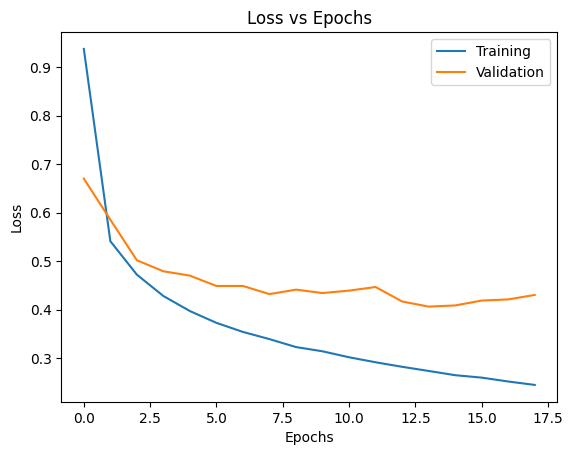

In [199]:
plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

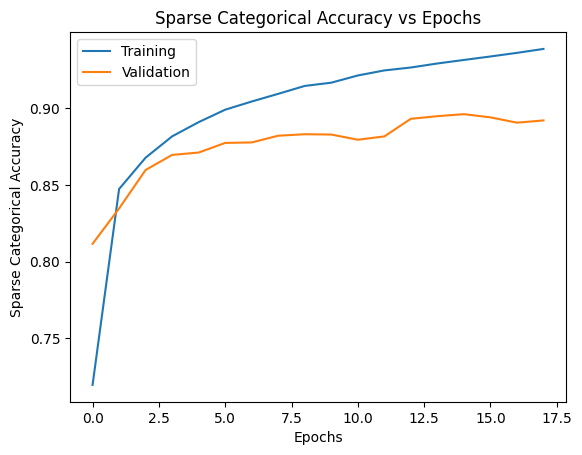

In [200]:
plt.plot(history_CNN.history['sparse_categorical_accuracy'])
plt.plot(history_CNN.history['val_sparse_categorical_accuracy'])
plt.title('Sparse Categorical Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Sparse Categorical Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [201]:
model_CNN.evaluate(X_test_mean, y_test, verbose=0)

[0.4302773177623749, 0.8919022679328918, 3.3616154193878174]

## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [202]:
new_model_MLP = get_model_MLP()
new_model_MLP.load_weights(checkpoint_path_MLP)

new_model_CNN = get_model_CNN()
new_model_CNN.load_weights(checkpoint_path_CNN)

In [203]:
np.random.seed(123)
rand_pos = np.random.randint(0, y_test.shape[0], 5)

predicted_MLP = new_model_MLP.predict(X_test_mean[rand_pos])
predicted_CNN = new_model_CNN.predict(X_test_mean[rand_pos])

1/1 [==============================] - 0s 94ms/step


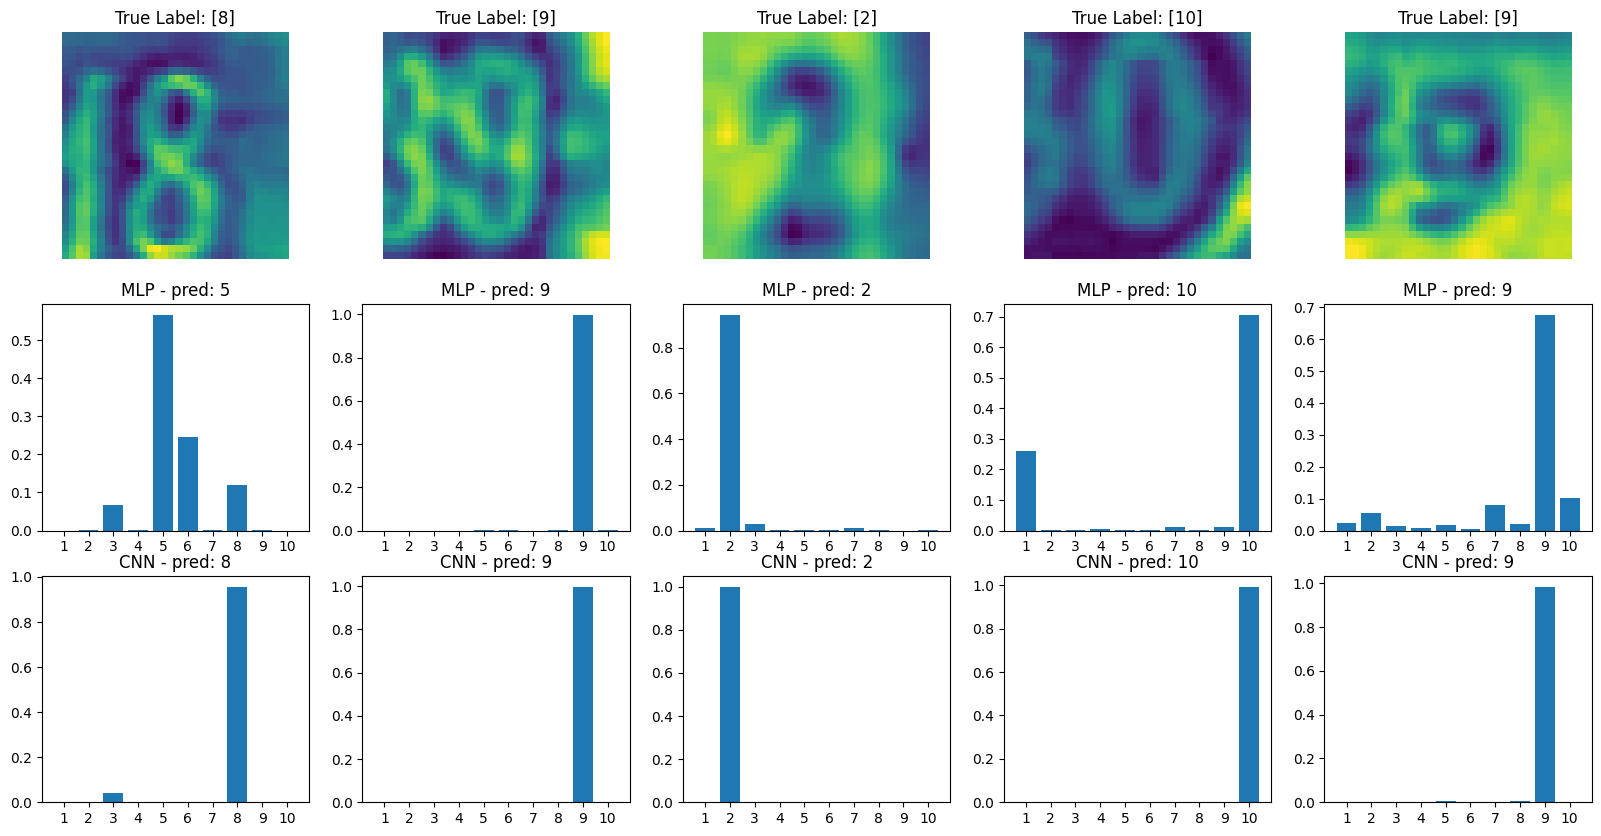

In [204]:
fig, axs = plt.subplots(3, 5, figsize=(20,10))

for i in range(5):
  img_i = rand_pos[i]
  xlt = np.arange(10)+1
  
  LAB_i = y_test[img_i]+1
  axs[0, i].imshow(X_test_mean[img_i])
  axs[0, i].axis('off')
  axs[0, i].set_title(f'True Label: {LAB_i}')

  pMLP_i = np.argmax(predicted_MLP[i])+1
  axs[1, i].bar(xlt, predicted_MLP[i])
  axs[1, i].set_xticks(xlt)
  axs[1, i].set_title(f'MLP - pred: {pMLP_i}')

  pCNN_i = np.argmax(predicted_CNN[i])+1
  axs[2, i].bar(xlt, predicted_CNN[i])
  axs[2, i].set_xticks(xlt)
  axs[2, i].set_title(f'CNN - pred: {pCNN_i}')

plt.show()